In [49]:
import numpy as np
import tensorflow as tf
import matplotlib as mp
from matplotlib import pyplot as pp
from tensorflow.keras.preprocessing import image as krpi

In [50]:
DATASET_ROOT = './dataset/'
TRAIN_FOLDER = 'train'
VALIDATION_FOLDER = 'validation'
TEST_FOLDER = 'test'

#### Custom Functions

In [59]:
# Tool to display data set and its labels
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
	if type(ims[0]) is np.ndarray:
		ims = np.array(ims).astype(np.uint8)
		if (ims.shape[-1] != 3):
			ims = ims.transpose((0,2,3,1))
	f = pp.figure(figsize=figsize)
	cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
	for i in range(len(ims)):
		sp = f.add_subplot(rows, cols, i+1)
		sp.axis('Off')
		if titles is not None:
			sp.set_title(titles[i], fontsize=16)
		pp.imshow(ims[i], interpolation=None if interp else 'none')

In [60]:
def imageShift(img_path, axis="horizontal", show=True):
    # load the image
    img = krpi.load_img(img_path)
    # convert to numpy array
    data = krpi.img_to_array(img)
    # expand dimension to one sample
    samples = np.expand_dims(data, 0)
    # create image data augmentation generator
    iq = krpi.ImageDataGenerator
    datagen = iq(width_shift_range=[-200,200]) if axis == "horizontal" else iq(height_shift_range=0.5)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # just return iterator
    if not show:
        return it
    # generate samples and plot
    for i in range(9):
        # define subplot
        pp.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pp.imshow(image)
    # show the figure
    pp.show()
    # reset and return
    it.reset()
    return it

#### Loading Dataset

In [61]:
IDG = krpi.ImageDataGenerator
TR_IDG = IDG(rescale=1)
VA_IDG = IDG(rescale=1)
TE_IDG = IDG(rescale=1)

# Generator for training data set
train_set = TR_IDG.flow_from_directory(
    DATASET_ROOT + TRAIN_FOLDER, 
    target_size=(224,224), 
    batch_size=10
);

# Generator for validation data set
validation_set = VA_IDG.flow_from_directory(
    DATASET_ROOT + VALIDATION_FOLDER, 
    target_size=(224,224), 
    batch_size=10
);

test_batch_size = 20

# Generator for test data set
test_set = TE_IDG.flow_from_directory(
    DATASET_ROOT + TEST_FOLDER, 
    target_size=(224,224), 
    batch_size=test_batch_size
);

Found 2411 images belonging to 2 classes.
Found 724 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


#### Displaying Dataset

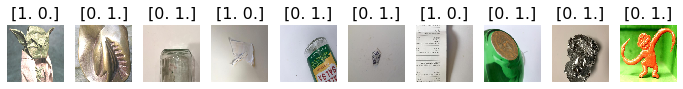

In [63]:
# next() gets batches of size batch_size
imgs, labels = next(train_set)
# display the batch and its labels
plots(imgs, titles=labels)